In [426]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [427]:
import pandas as pd

df = pd.read_csv('hw05_data.csv', delimiter=',')
df.head(7)

,Weather,Just Ate,Work Late,Will Exercise?
0,Sunny,yes,no,yes
1,Rainy,yes,yes,no
2,Sunny,no,yes,yes
3,Rainy,no,no,no
4,Rainy,no,no,yes
5,Sunny,yes,no,yes
6,Rainy,no,yes,no


In [428]:
X = df.drop('Will Exercise?', axis=1)
y = df['Will Exercise?']

In [429]:
X.head(7)

,Weather,Just Ate,Work Late
0,Sunny,yes,no
1,Rainy,yes,yes
2,Sunny,no,yes
3,Rainy,no,no
4,Rainy,no,no
5,Sunny,yes,no
6,Rainy,no,yes


In [430]:
y.head(7)

0    yes
1     no
2    yes
3     no
4    yes
5    yes
6     no
Name: Will Exercise?, dtype: object

In [431]:
X = pd.get_dummies(X, columns=['Weather', 'Just Ate', 'Work Late'], drop_first=True)
X.head(7)

,Weather_Sunny,Just Ate_yes,Work Late_yes
0,True,True,False
1,False,True,True
2,True,False,True
3,False,False,False
4,False,False,False
5,True,True,False
6,False,False,True


In [432]:
y = pd.get_dummies(y, columns=['Will Exercise?'], drop_first=True)
y.head(7)

,yes
0,True
1,False
2,True
3,False
4,True
5,True
6,False


In [433]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(random_state=42, criterion='gini')

dt_classifier.fit(X, y)

DecisionTreeClassifier(random_state=42)

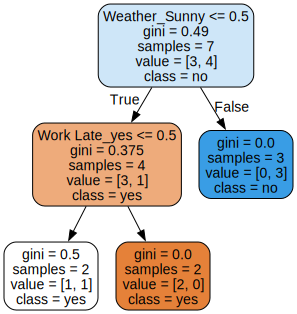

In [434]:
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
        dt_classifier,
        out_file=os.path.join(IMAGES_PATH, "fortnite.dot"),
        feature_names=X.columns.to_numpy(),
        class_names=['yes','no',],
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join(IMAGES_PATH, "fortnite.dot"))

In [435]:
new_data = ['Sunny', 'yes', 'yes']
new_X = df.drop('Will Exercise?', axis=1)[0:0]
new_X.loc[len(df)] = new_data
new_X.head()

,Weather,Just Ate,Work Late
7,Sunny,yes,yes


In [443]:
new_X_new = pd.get_dummies(new_X)
new_X_new.head()

,Weather_Sunny,Just Ate_yes,Work Late_yes
7,True,True,True


In [447]:
proba = dt_classifier.predict_proba(new_X_new)
result = dt_classifier.predict(new_X_new)

print(f"Probability will exercise: {proba}")
print(f"Prediction: {result[0]}")

Probability will exercise: [[0. 1.]]
Prediction: True
